In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()

This is taxi fare data where we are analysing the highest trip days finding out the outliers 

In [ ]:
df = pd.read_csv(r'C:\Users\himan\Downloads\NYCtaxitrip\taxi_trip_data.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 17 columns):
 #   Column               Dtype  
---  ------               -----  
 0   vendor_id            int64  
 1   pickup_datetime      object 
 2   dropoff_datetime     object 
 3   passenger_count      int64  
 4   trip_distance        float64
 5   rate_code            int64  
 6   store_and_fwd_flag   object 
 7   payment_type         int64  
 8   fare_amount          float64
 9   extra                float64
 10  mta_tax              float64
 11  tip_amount           float64
 12  tolls_amount         float64
 13  imp_surcharge        float64
 14  total_amount         float64
 15  pickup_location_id   int64  
 16  dropoff_location_id  int64  
dtypes: float64(8), int64(6), object(3)
memory usage: 1.3+ GB


In [7]:
df.describe()

,vendor_id,passenger_count,trip_distance,rate_code,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,1.614328e+00,1.602949e+00,8.849280e+00,1.201239e+00,1.189299e+00,3.165255e+01,3.383781e-01,4.819289e-01,5.598527e+00,2.137918e+00,2.978831e-01,4.051607e+01,1.535632e+02,1.481428e+02
std,5.146576e-01,1.245782e+00,5.882028e+00,1.250733e+00,4.339876e-01,1.606011e+02,5.512911e-01,1.207282e-01,4.840596e+00,3.750309e+00,3.406027e-02,1.611634e+02,6.076456e+01,7.574853e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-8.000000e+02,-8.000000e+01,-5.000000e-01,-3.224200e+02,-5.250000e+01,-3.000000e-01,-8.003000e+02,1.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,5.820000e+00,1.000000e+00,1.000000e+00,2.350000e+01,0.000000e+00,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,2.906000e+01,1.320000e+02,8.800000e+01
50%,2.000000e+00,1.000000e+00,8.480000e+00,1.000000e+00,1.000000e+00,2.850000e+01,0.000000e+00,5.000000e-01,5.560000e+00,0.000000e+00,3.000000e-01,3.730000e+01,1.380000e+02,1.420000e+02
75%,2.000000e+00,2.000000e+00,1.110000e+01,1.000000e+00,1.000000e+00,3.700000e+01,5.000000e-01,5.000000e-01,7.960000e+00,5.760000e+00,3.000000e-01,4.906000e+01,1.860000e+02,2.290000e+02
max,4.000000e+00,9.000000e+00,7.655760e+03,9.900000e+01,5.000000e+00,3.984600e+05,8.400000e+01,1.500000e+02,4.960000e+02,9.182500e+02,1.000000e+00,3.985220e+05,2.650000e+02,2.650000e+02


In [8]:
df.isnull().sum()

vendor_id              0
pickup_datetime        0
dropoff_datetime       0
passenger_count        0
trip_distance          0
rate_code              0
store_and_fwd_flag     0
payment_type           0
fare_amount            0
extra                  0
mta_tax                0
tip_amount             0
tolls_amount           0
imp_surcharge          0
total_amount           0
pickup_location_id     0
dropoff_location_id    0
dtype: int64

In [9]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id
0,2,2018-03-29 13:37:13,2018-03-29 14:17:01,1,18.15,3,N,1,70.0,0.0,0.0,16.16,10.50,0.3,96.96,161,1
1,2,2018-03-29 13:37:18,2018-03-29 14:15:33,1,4.59,1,N,1,25.0,0.0,0.5,5.16,0.00,0.3,30.96,13,230
2,2,2018-03-29 13:26:57,2018-03-29 13:28:03,1,0.30,1,N,1,3.0,0.0,0.5,0.76,0.00,0.3,4.56,231,231
3,2,2018-03-29 13:07:48,2018-03-29 14:03:05,2,16.97,1,N,1,49.5,0.0,0.5,5.61,5.76,0.3,61.67,231,138
4,2,2018-03-29 14:19:11,2018-03-29 15:19:59,5,14.45,1,N,1,45.5,0.0,0.5,10.41,5.76,0.3,62.47,87,138


In [10]:
df.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'rate_code', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'imp_surcharge', 'total_amount', 'pickup_location_id',
       'dropoff_location_id'],
      dtype='object')

In [11]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

 We will now create a displot which is used to show univariant set of collected data show passenger count data distribution as we want to show one variable against another variable.

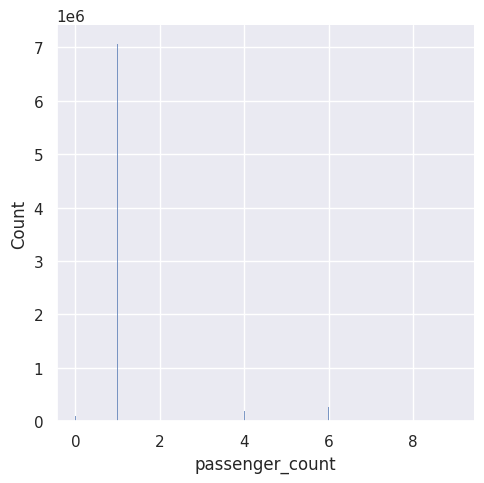

In [13]:
sns.displot(df['passenger_count'])

We will now convert the dates into days of the week to see on which day the most and least trips are taken

In [20]:
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()

In [21]:
df['pickup_day'].value_counts()

Thursday     1664099
Friday       1588090
Wednesday    1451808
Tuesday      1422420
Monday       1343747
Sunday       1284224
Saturday     1245612
Name: pickup_day, dtype: int64

In [22]:
df['dropoff_day'].value_counts()

Thursday     1650531
Friday       1584692
Wednesday    1447014
Tuesday      1418264
Monday       1343468
Sunday       1301192
Saturday     1254839
Name: dropoff_day, dtype: int64

<AxesSubplot: xlabel='dropoff_day', ylabel='count'>

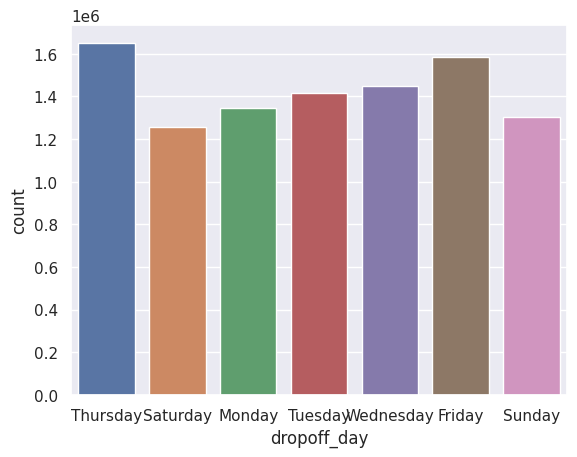

In [24]:
sns.countplot(x='dropoff_day', data=df)

<AxesSubplot: xlabel='pickup_day', ylabel='count'>

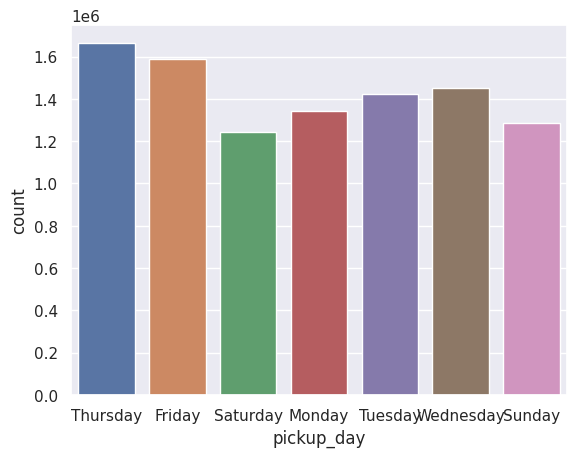

In [25]:
sns.countplot(x='pickup_day', data=df)

We found out that maximum trips were taken on Thursday and least were taken on Saturday

In [29]:
df['pickup_time']=df['pickup_datetime'].dt.time

In [30]:
df['dropoff_time']=df['dropoff_datetime'].dt.time

In [32]:
df.dtypes

vendor_id                       int64
pickup_datetime        datetime64[ns]
dropoff_datetime       datetime64[ns]
passenger_count                 int64
trip_distance                 float64
rate_code                       int64
store_and_fwd_flag             object
payment_type                    int64
fare_amount                   float64
extra                         float64
mta_tax                       float64
tip_amount                    float64
tolls_amount                  float64
imp_surcharge                 float64
total_amount                  float64
pickup_location_id              int64
dropoff_location_id             int64
pickup_day                     object
dropoff_day                    object
pickup_time                    object
dropoff_time                   object
dtype: object

In [35]:
def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'
    
df['pickup_timezone']=df['pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
df['dropoff_timezone']=df['dropoff_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

In [36]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,...,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,pickup_day,dropoff_day,pickup_time,dropoff_time,pickup_timezone,dropoff_timezone
0,2,2018-03-29 13:37:13,2018-03-29 14:17:01,1,18.15,3,N,1,70.0,0.0,...,0.3,96.96,161,1,Thursday,Thursday,13:37:13,14:17:01,midday,midday
1,2,2018-03-29 13:37:18,2018-03-29 14:15:33,1,4.59,1,N,1,25.0,0.0,...,0.3,30.96,13,230,Thursday,Thursday,13:37:18,14:15:33,midday,midday
2,2,2018-03-29 13:26:57,2018-03-29 13:28:03,1,0.30,1,N,1,3.0,0.0,...,0.3,4.56,231,231,Thursday,Thursday,13:26:57,13:28:03,midday,midday
3,2,2018-03-29 13:07:48,2018-03-29 14:03:05,2,16.97,1,N,1,49.5,0.0,...,0.3,61.67,231,138,Thursday,Thursday,13:07:48,14:03:05,midday,midday
4,2,2018-03-29 14:19:11,2018-03-29 15:19:59,5,14.45,1,N,1,45.5,0.0,...,0.3,62.47,87,138,Thursday,Thursday,14:19:11,15:19:59,midday,midday


In [39]:
df['duration']=df['dropoff_datetime'] - df['pickup_datetime']

In [42]:
df.drop(['trip_duration'], axis=1)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,...,total_amount,pickup_location_id,dropoff_location_id,pickup_day,dropoff_day,pickup_time,dropoff_time,pickup_timezone,dropoff_timezone,duration
0,2,2018-03-29 13:37:13,2018-03-29 14:17:01,1,18.15,3,N,1,70.0,0.0,...,96.96,161,1,Thursday,Thursday,13:37:13,14:17:01,midday,midday,0 days 00:39:48
1,2,2018-03-29 13:37:18,2018-03-29 14:15:33,1,4.59,1,N,1,25.0,0.0,...,30.96,13,230,Thursday,Thursday,13:37:18,14:15:33,midday,midday,0 days 00:38:15
2,2,2018-03-29 13:26:57,2018-03-29 13:28:03,1,0.30,1,N,1,3.0,0.0,...,4.56,231,231,Thursday,Thursday,13:26:57,13:28:03,midday,midday,0 days 00:01:06
3,2,2018-03-29 13:07:48,2018-03-29 14:03:05,2,16.97,1,N,1,49.5,0.0,...,61.67,231,138,Thursday,Thursday,13:07:48,14:03:05,midday,midday,0 days 00:55:17
4,2,2018-03-29 14:19:11,2018-03-29 15:19:59,5,14.45,1,N,1,45.5,0.0,...,62.47,87,138,Thursday,Thursday,14:19:11,15:19:59,midday,midday,0 days 01:00:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,2,2018-03-29 12:16:01,2018-03-29 13:03:31,1,3.45,1,N,1,27.5,0.0,...,33.96,211,229,Thursday,Thursday,12:16:01,13:03:31,midday,midday,0 days 00:47:30
9999996,1,2018-03-29 12:26:25,2018-03-29 13:09:54,1,6.80,1,N,1,30.0,0.0,...,35.42,79,238,Thursday,Thursday,12:26:25,13:09:54,midday,midday,0 days 00:43:29
9999997,2,2018-03-29 12:22:12,2018-03-29 13:01:07,2,8.46,1,N,1,35.0,0.0,...,49.87,138,162,Thursday,Thursday,12:22:12,13:01:07,midday,midday,0 days 00:38:55
9999998,2,2018-03-29 13:57:40,2018-03-29 15:07:42,1,14.43,1,N,1,52.5,0.0,...,70.87,13,138,Thursday,Thursday,13:57:40,15:07:42,midday,midday,0 days 01:10:02


In [43]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,...,pickup_location_id,dropoff_location_id,pickup_day,dropoff_day,pickup_time,dropoff_time,pickup_timezone,dropoff_timezone,trip_duration,duration
0,2,2018-03-29 13:37:13,2018-03-29 14:17:01,1,18.15,3,N,1,70.0,0.0,...,161,1,Thursday,Thursday,13:37:13,14:17:01,midday,midday,0 days 00:39:48,0 days 00:39:48
1,2,2018-03-29 13:37:18,2018-03-29 14:15:33,1,4.59,1,N,1,25.0,0.0,...,13,230,Thursday,Thursday,13:37:18,14:15:33,midday,midday,0 days 00:38:15,0 days 00:38:15
2,2,2018-03-29 13:26:57,2018-03-29 13:28:03,1,0.30,1,N,1,3.0,0.0,...,231,231,Thursday,Thursday,13:26:57,13:28:03,midday,midday,0 days 00:01:06,0 days 00:01:06
3,2,2018-03-29 13:07:48,2018-03-29 14:03:05,2,16.97,1,N,1,49.5,0.0,...,231,138,Thursday,Thursday,13:07:48,14:03:05,midday,midday,0 days 00:55:17,0 days 00:55:17
4,2,2018-03-29 14:19:11,2018-03-29 15:19:59,5,14.45,1,N,1,45.5,0.0,...,87,138,Thursday,Thursday,14:19:11,15:19:59,midday,midday,0 days 01:00:48,0 days 01:00:48


In [51]:
df.drop(["duration"], axis = 1, inplace = True)

In [52]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,...,total_amount,pickup_location_id,dropoff_location_id,pickup_day,dropoff_day,pickup_time,dropoff_time,pickup_timezone,dropoff_timezone,trip_duration
0,2,2018-03-29 13:37:13,2018-03-29 14:17:01,1,18.15,3,N,1,70.0,0.0,...,96.96,161,1,Thursday,Thursday,13:37:13,14:17:01,midday,midday,0 days 00:39:48
1,2,2018-03-29 13:37:18,2018-03-29 14:15:33,1,4.59,1,N,1,25.0,0.0,...,30.96,13,230,Thursday,Thursday,13:37:18,14:15:33,midday,midday,0 days 00:38:15
2,2,2018-03-29 13:26:57,2018-03-29 13:28:03,1,0.30,1,N,1,3.0,0.0,...,4.56,231,231,Thursday,Thursday,13:26:57,13:28:03,midday,midday,0 days 00:01:06
3,2,2018-03-29 13:07:48,2018-03-29 14:03:05,2,16.97,1,N,1,49.5,0.0,...,61.67,231,138,Thursday,Thursday,13:07:48,14:03:05,midday,midday,0 days 00:55:17
4,2,2018-03-29 14:19:11,2018-03-29 15:19:59,5,14.45,1,N,1,45.5,0.0,...,62.47,87,138,Thursday,Thursday,14:19:11,15:19:59,midday,midday,0 days 01:00:48


<AxesSubplot: xlabel='dropoff_timezone', ylabel='count'>

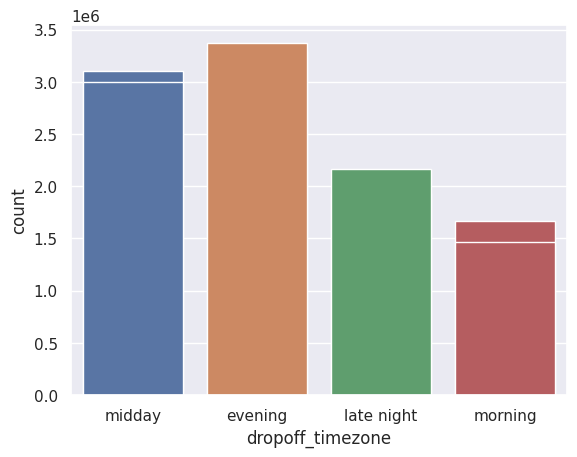

In [56]:
sns.countplot(x='pickup_timezone', data=df)
sns.countplot(x='dropoff_timezone', data=df)

In [57]:
df.dtypes

vendor_id                        int64
pickup_datetime         datetime64[ns]
dropoff_datetime        datetime64[ns]
passenger_count                  int64
trip_distance                  float64
rate_code                        int64
store_and_fwd_flag              object
payment_type                     int64
fare_amount                    float64
extra                          float64
mta_tax                        float64
tip_amount                     float64
tolls_amount                   float64
imp_surcharge                  float64
total_amount                   float64
pickup_location_id               int64
dropoff_location_id              int64
pickup_day                      object
dropoff_day                     object
pickup_time                     object
dropoff_time                    object
pickup_timezone                 object
dropoff_timezone                object
trip_duration          timedelta64[ns]
dtype: object

In [60]:
df['trip_duration_hour']=df['trip_duration']/3600 

In [62]:
df['triphours'] = df['trip_duration_hour'] / pd.Timedelta(hours=1)